## Final Project Submission

Please fill out:
* Student name: Dicchyant Gurung
* Student pace: Self paced
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


### Solution

In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


### Step 1: Clean the data

In [3]:
df.rename(columns=lambda x: x.title(), inplace=True)
df.head()

,Id,Date,Price,Bedrooms,Bathrooms,Sqft_Living,Sqft_Lot,Floors,Waterfront,View,...,Grade,Sqft_Above,Sqft_Basement,Yr_Built,Yr_Renovated,Zipcode,Lat,Long,Sqft_Living15,Sqft_Lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [4]:
df.rename(columns={'Date':'Date Sold'}, inplace=True)
df.head()

,Id,Date Sold,Price,Bedrooms,Bathrooms,Sqft_Living,Sqft_Lot,Floors,Waterfront,View,...,Grade,Sqft_Above,Sqft_Basement,Yr_Built,Yr_Renovated,Zipcode,Lat,Long,Sqft_Living15,Sqft_Lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


### Look for missing values

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             21597 non-null  int64  
 1   Date Sold      21597 non-null  object 
 2   Price          21597 non-null  float64
 3   Bedrooms       21597 non-null  int64  
 4   Bathrooms      21597 non-null  float64
 5   Sqft_Living    21597 non-null  int64  
 6   Sqft_Lot       21597 non-null  int64  
 7   Floors         21597 non-null  float64
 8   Waterfront     19221 non-null  float64
 9   View           21534 non-null  float64
 10  Condition      21597 non-null  int64  
 11  Grade          21597 non-null  int64  
 12  Sqft_Above     21597 non-null  int64  
 13  Sqft_Basement  21597 non-null  object 
 14  Yr_Built       21597 non-null  int64  
 15  Yr_Renovated   17755 non-null  float64
 16  Zipcode        21597 non-null  int64  
 17  Lat            21597 non-null  float64
 18  Long  

In [6]:
df.isnull().sum()

Id                  0
Date Sold           0
Price               0
Bedrooms            0
Bathrooms           0
Sqft_Living         0
Sqft_Lot            0
Floors              0
Waterfront       2376
View               63
Condition           0
Grade               0
Sqft_Above          0
Sqft_Basement       0
Yr_Built            0
Yr_Renovated     3842
Zipcode             0
Lat                 0
Long                0
Sqft_Living15       0
Sqft_Lot15          0
dtype: int64

In [7]:
df1 = df.copy()

In [8]:
df1.Waterfront.value_counts()

0.0    19075
1.0      146
Name: Waterfront, dtype: int64

'Waterfront' seems to be a categorical column with 0 as no waterfront and 1 as waterfront available. Since, the majority of the houses does not seem to have a waterfront, we will assume that the missing values also does not have a waterfront. 

We will replace the missing values with zero.

In [9]:
df1.View.value_counts()

0.0    19422
2.0      957
3.0      508
1.0      330
4.0      317
Name: View, dtype: int64

'View' is another categorcial column with values from 0 to 4. Since the majority of the data points towards 0 for not viewed, we are going to assume that the houses with missing values have also not been viewed.

We will replace the missing values with zero.

In [10]:
df1.Yr_Renovated.value_counts()

0.0       17011
2014.0       73
2003.0       31
2013.0       31
2007.0       30
          ...  
1946.0        1
1959.0        1
1971.0        1
1951.0        1
1954.0        1
Name: Yr_Renovated, Length: 70, dtype: int64

'Yr_Renovated' has 17011 values as 0. This means that majority of the houses have not been renovated in our data set. We will also assume here that none of the houses with missing values have been renovated.

We will replace the missing values with zero.

In [11]:
df1.fillna(0, inplace=True)

In [12]:
df1.isnull().sum()

Id               0
Date Sold        0
Price            0
Bedrooms         0
Bathrooms        0
Sqft_Living      0
Sqft_Lot         0
Floors           0
Waterfront       0
View             0
Condition        0
Grade            0
Sqft_Above       0
Sqft_Basement    0
Yr_Built         0
Yr_Renovated     0
Zipcode          0
Lat              0
Long             0
Sqft_Living15    0
Sqft_Lot15       0
dtype: int64

In [13]:
df1.Yr_Renovated.value_counts()

0.0       20853
2014.0       73
2003.0       31
2013.0       31
2007.0       30
          ...  
1946.0        1
1959.0        1
1971.0        1
1951.0        1
1954.0        1
Name: Yr_Renovated, Length: 70, dtype: int64

Majority of houses are not renovated and the data spreads across 70 variables accounting to less than 10% of the total dataset.

We will drop this column as it will not have any significant impact on the overall model.

In [14]:
df1.drop(['Yr_Renovated'], axis=1, inplace=True)

In [15]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             21597 non-null  int64  
 1   Date Sold      21597 non-null  object 
 2   Price          21597 non-null  float64
 3   Bedrooms       21597 non-null  int64  
 4   Bathrooms      21597 non-null  float64
 5   Sqft_Living    21597 non-null  int64  
 6   Sqft_Lot       21597 non-null  int64  
 7   Floors         21597 non-null  float64
 8   Waterfront     21597 non-null  float64
 9   View           21597 non-null  float64
 10  Condition      21597 non-null  int64  
 11  Grade          21597 non-null  int64  
 12  Sqft_Above     21597 non-null  int64  
 13  Sqft_Basement  21597 non-null  object 
 14  Yr_Built       21597 non-null  int64  
 15  Zipcode        21597 non-null  int64  
 16  Lat            21597 non-null  float64
 17  Long           21597 non-null  float64
 18  Sqft_L

In [16]:
df1.head()

,Id,Date Sold,Price,Bedrooms,Bathrooms,Sqft_Living,Sqft_Lot,Floors,Waterfront,View,Condition,Grade,Sqft_Above,Sqft_Basement,Yr_Built,Zipcode,Lat,Long,Sqft_Living15,Sqft_Lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,3,7,1180,0.0,1955,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,98074,47.6168,-122.045,1800,7503


Column 'Lat' and 'Long' represents the location of the houses. We will use the Zipcode column for this model to account for location.

Lat and Long will be dropped.

In [17]:
df1.drop(['Lat', 'Long'], axis=1, inplace=True)
df1.head()

,Id,Date Sold,Price,Bedrooms,Bathrooms,Sqft_Living,Sqft_Lot,Floors,Waterfront,View,Condition,Grade,Sqft_Above,Sqft_Basement,Yr_Built,Zipcode,Sqft_Living15,Sqft_Lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,3,7,1180,0.0,1955,98178,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,98125,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,98028,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,98136,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,98074,1800,7503


### Step 2: Pre-Process the data

Since we are about to split continuous and categorical values. It'll be a good idea to make the 'Id' column an index such that if we have to join column later, we can do it with complete accuracy.

In [18]:
df1.set_index('Id', drop=True, inplace=True)

### Identify categorical and continuous variables

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline

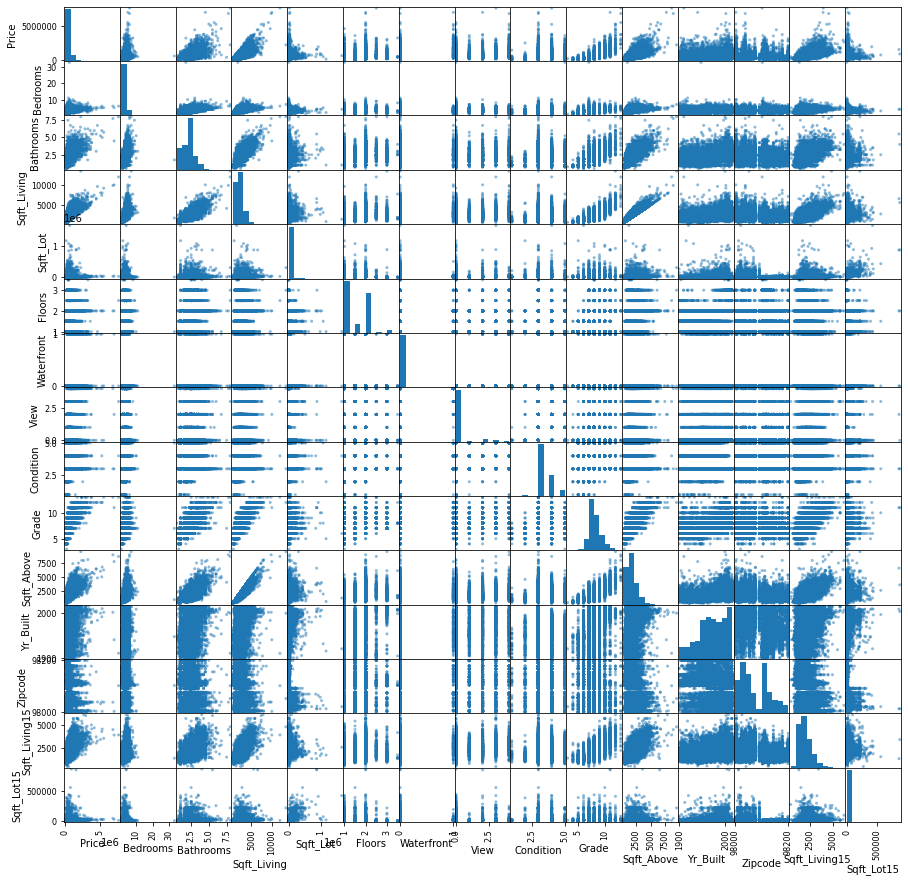

In [20]:
pd.plotting.scatter_matrix(df1, figsize=(15,15));

Scatter matrix allows us to quickly spot continuous vs categorical values. Categorical values will have a non-continuous and distinct patterns which is seen here mostly in the middle of the scatter-plot. Continuous values will have a linear and continous spread of data trending towards one direction. Let's get a more clearer graph to classify each variable.

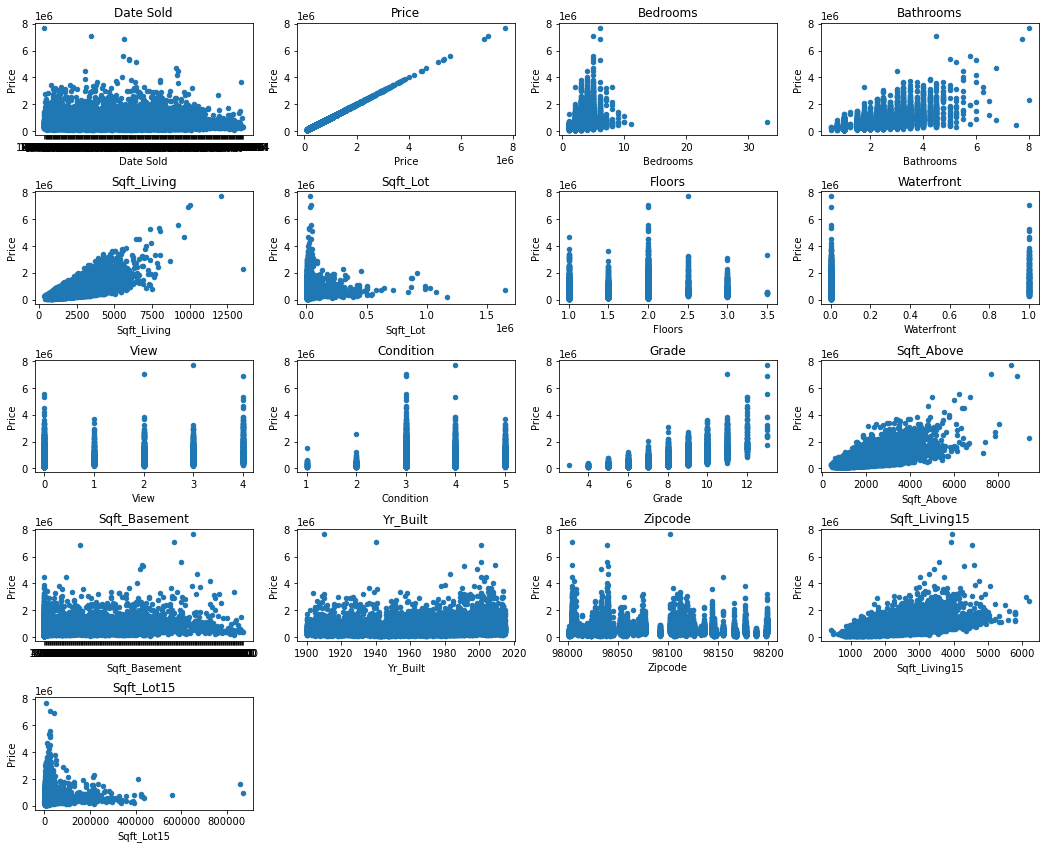

In [21]:
plt.figure(figsize=(18,30))
plt.subplots_adjust(hspace = 0.5)

for index, value in enumerate(df1):
    ax = plt.subplot(10, 4, index+1)
    df1.plot(value, 'Price', ax=ax, kind='scatter', legend=False)
    ax.set_title(value)

In [22]:
continuous = ['Price', 'Sqft_Living', 'Sqft_Lot', 'Sqft_Above', 'Sqft_Basement', 'Sqft_Living15', 'Sqft_Lot15']
categoricals = ['Date Sold', 'Bedrooms', 'Bathrooms', 'Floors', 'Waterfront', 'View', 'Condition', 'Grade', 'Yr_Built', 'Zipcode']

### Continuous Variables

In [23]:
continuous_df = df1[continuous]

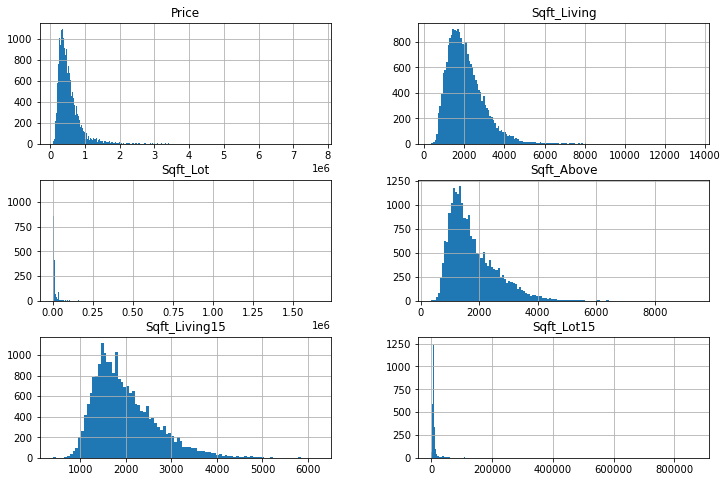

In [24]:
continuous_df.hist(figsize=(12,8), bins='auto');

You can see in the above histograms that the continuous varables are postively skewed with outliers on the higher end of values.

Let's remove the outliers to make the data more normal.

### Remove Outliers

In [25]:
continuous_df.Sqft_Basement.value_counts(sort=True)

0.0       12826
?           454
600.0       217
500.0       209
700.0       208
          ...  
295.0         1
652.0         1
588.0         1
1275.0        1
935.0         1
Name: Sqft_Basement, Length: 304, dtype: int64

'Sqft_Basement' seems to have a lot of zero values, and a character which will not allow any operation. We will remove this column for now.

In [26]:
continuous_2 = ['Price', 'Sqft_Living', 'Sqft_Lot', 'Sqft_Above', 'Sqft_Living15', 'Sqft_Lot15']

In [27]:
cont_df = df1[continuous_2]

Let's create a box plot to check for outliers

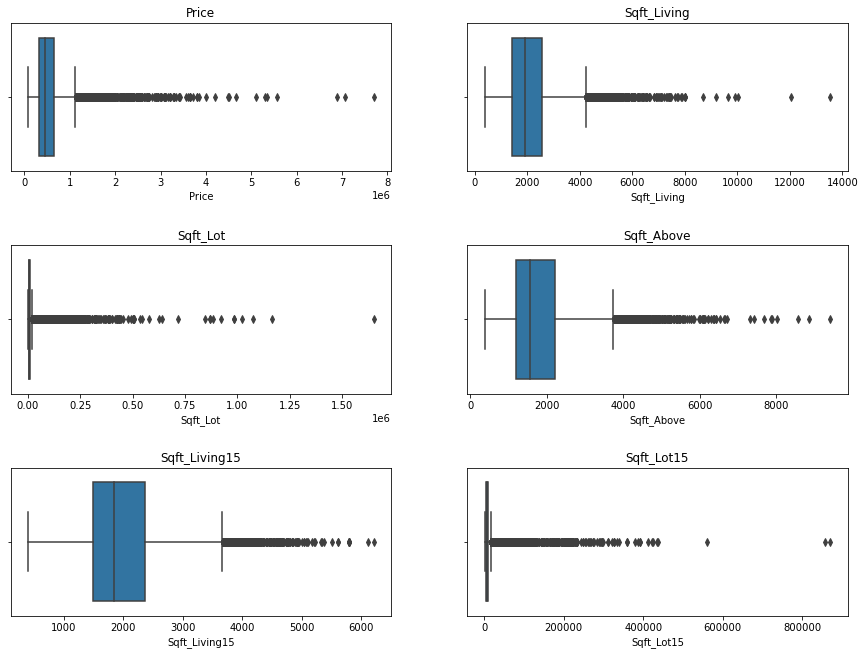

In [28]:
import seaborn as sns

plt.figure(figsize=(15,15))
plt.subplots_adjust(hspace = 0.5)

for index, value in enumerate(cont_df):
    ax = plt.subplot(4, 2, index+1)
    sns.boxplot(ax=ax, x=cont_df[value])
    ax.set_title(value)

Scatter plot also helps spot out outliers.

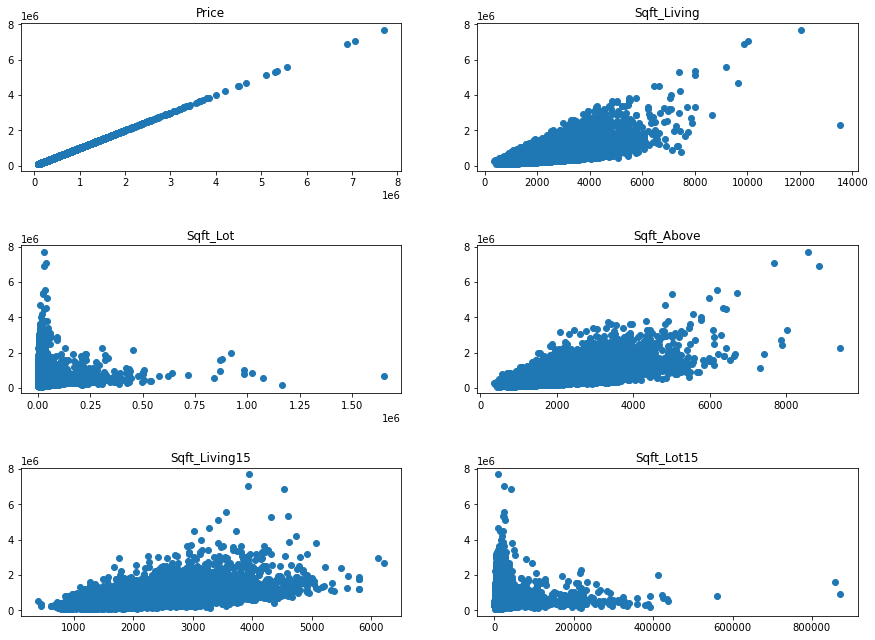

In [29]:
plt.figure(figsize=(15,15))
plt.subplots_adjust(hspace = 0.5)

for index, value in enumerate(cont_df):
    ax = plt.subplot(4, 2, index+1)
    ax.scatter(x=cont_df[value], y=cont_df['Price'])
    ax.set_title(value)

We're going to use z-score to identify and remove outliers.

### Z-Score

In [30]:
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(cont_df))

In [31]:
cont_df_o = cont_df[(z < 3).all(axis=1)]

In [32]:
cont_df_o.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20471 entries, 7129300520 to 1523300157
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Price          20471 non-null  float64
 1   Sqft_Living    20471 non-null  int64  
 2   Sqft_Lot       20471 non-null  int64  
 3   Sqft_Above     20471 non-null  int64  
 4   Sqft_Living15  20471 non-null  int64  
 5   Sqft_Lot15     20471 non-null  int64  
dtypes: float64(1), int64(5)
memory usage: 1.1 MB


Let's do the box-plot again

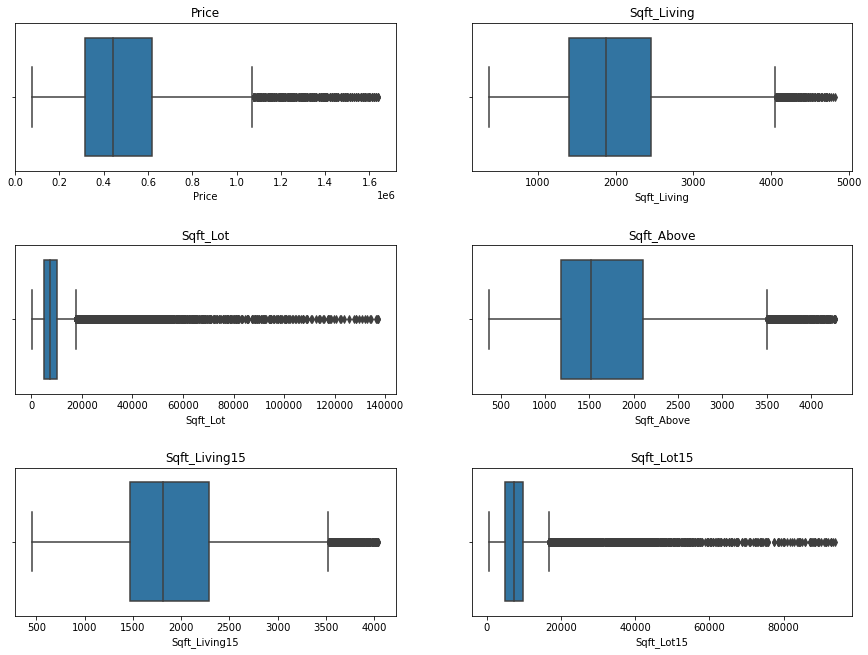

In [33]:
plt.figure(figsize=(15,15))
plt.subplots_adjust(hspace = 0.5)

for index, value in enumerate(cont_df_o):
    ax = plt.subplot(4, 2, index+1)
    sns.boxplot(ax=ax, x=cont_df_o[value])
    ax.set_title(value)

We can see a lot of improvement in 'Price', 'Sqft_Living' and 'Sqft_Above'. The box-plot for Sqft-Lot is skewed to the left as there are majority zero values in those variables that is causing the mean to approximate closer to zero. 

Let's plot this again on a scatter-plot.

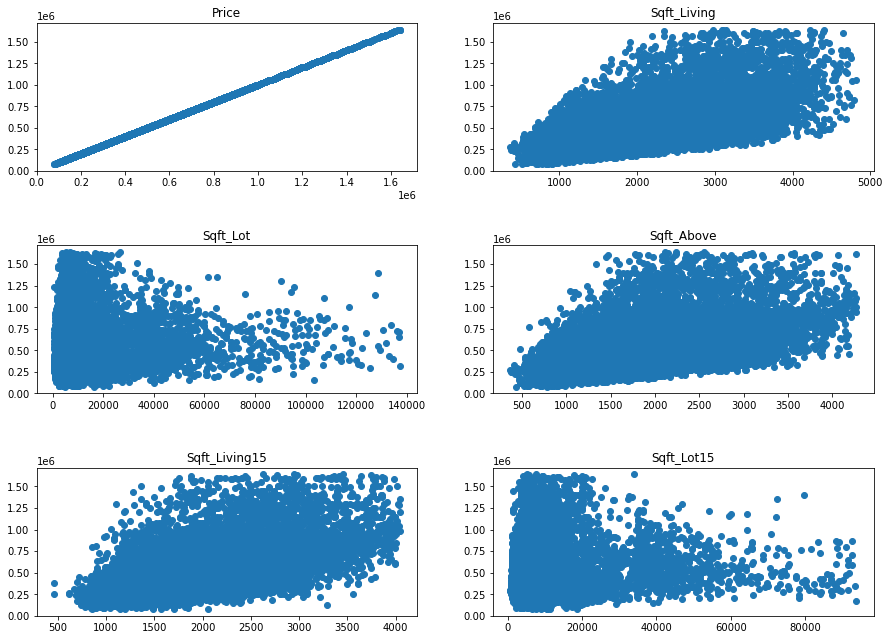

In [34]:
plt.figure(figsize=(15,15))
plt.subplots_adjust(hspace = 0.5)

for index, value in enumerate(cont_df_o):
    ax = plt.subplot(4, 2, index+1)
    ax.scatter(x=cont_df_o[value], y=cont_df_o['Price'])
    ax.set_title(value)

Both the box-plot and scatter plot show major inprovement in the data quality.

In [35]:
cont_df_final = cont_df_o.copy()

### Categorical variables

In [36]:
categoricals = ['Date Sold', 'Bedrooms', 'Bathrooms', 'Floors', 'Waterfront', 'View', 'Condition', 'Grade', 'Yr_Built', 'Zipcode']

In [37]:
categorical_df = df1[categoricals]

In [38]:
categorical_df.head()

,Date Sold,Bedrooms,Bathrooms,Floors,Waterfront,View,Condition,Grade,Yr_Built,Zipcode
Id,,,,,,,,,,
7129300520,10/13/2014,3,1.00,1.0,0.0,0.0,3,7,1955,98178
6414100192,12/9/2014,3,2.25,2.0,0.0,0.0,3,7,1951,98125
5631500400,2/25/2015,2,1.00,1.0,0.0,0.0,3,6,1933,98028
2487200875,12/9/2014,4,3.00,1.0,0.0,0.0,5,7,1965,98136
1954400510,2/18/2015,3,2.00,1.0,0.0,0.0,3,8,1987,98074


In [39]:
for i in categorical_df.columns:
    print (i +':', len(categorical_df[i].value_counts()))

Date Sold: 372
Bedrooms: 12
Bathrooms: 29
Floors: 6
Waterfront: 2
View: 5
Condition: 5
Grade: 11
Yr_Built: 116
Zipcode: 70


In [40]:
for i in categorical_df.columns:
    print (i + ': \n')
    print (categorical_df[i].value_counts().sort_values(ascending=False))
    print ('\n')

Date Sold: 

6/23/2014     142
6/26/2014     131
6/25/2014     131
7/8/2014      127
4/27/2015     126
             ... 
8/30/2014       1
5/17/2014       1
3/8/2015        1
5/24/2015       1
11/30/2014      1
Name: Date Sold, Length: 372, dtype: int64


Bedrooms: 

3     9824
4     6882
2     2760
5     1601
6      272
1      196
7       38
8       13
9        6
10       3
33       1
11       1
Name: Bedrooms, dtype: int64


Bathrooms: 

2.50    5377
1.00    3851
1.75    3048
2.25    2047
2.00    1930
1.50    1445
2.75    1185
3.00     753
3.50     731
3.25     589
3.75     155
4.00     136
4.50     100
4.25      79
0.75      71
4.75      23
5.00      21
5.25      13
5.50      10
1.25       9
6.00       6
5.75       4
0.50       4
8.00       2
6.25       2
6.75       2
6.50       2
7.50       1
7.75       1
Name: Bathrooms, dtype: int64


Floors: 

1.0    10673
2.0     8235
1.5     1910
3.0      611
2.5      161
3.5        7
Name: Floors, dtype: int64


Waterfront: 

0.0    21451
1.0

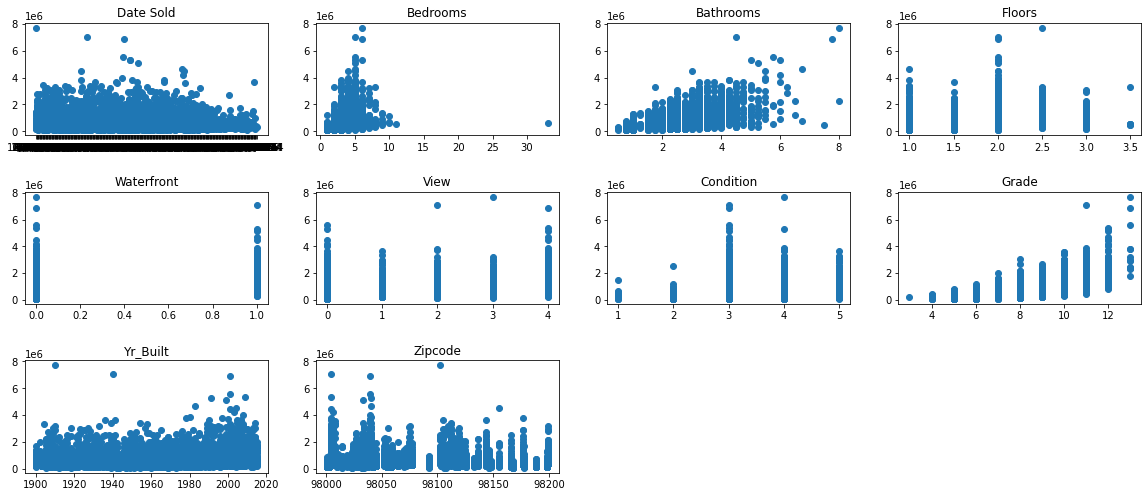

In [41]:
plt.figure(figsize=(20,30))
plt.subplots_adjust(hspace = 0.5)

for index, value in enumerate(categorical_df):
    ax = plt.subplot(10, 4, index+1)
    ax.scatter(x=categorical_df[value], y=df1['Price'])
    ax.set_title(value);

From the above graph, we can see that 'DateSold', 'Yr_Built', and 'Zipcode' are true categorical values while the rest are ordinal. There are also a lot of outliers present in the data, which needs to be removed.

The ordinal variables have an order so we do not need to convert them into dummy variables. However, we can reduce the variability among each with some z-score calculation.

In [42]:
ordinal = ['Bedrooms', 'Bathrooms', 'Floors', 'View', 'Condition', 'Grade']

In [43]:
ordinal_df = categorical_df[ordinal]

In [44]:
ordinal_df

,Bedrooms,Bathrooms,Floors,View,Condition,Grade
Id,,,,,,
7129300520,3,1.00,1.0,0.0,3,7
6414100192,3,2.25,2.0,0.0,3,7
5631500400,2,1.00,1.0,0.0,3,6
2487200875,4,3.00,1.0,0.0,5,7
1954400510,3,2.00,1.0,0.0,3,8
...,...,...,...,...,...,...
263000018,3,2.50,3.0,0.0,3,8
6600060120,4,2.50,2.0,0.0,3,8
1523300141,2,0.75,2.0,0.0,3,7


### Z-Score

In [45]:
z2 = np.abs(stats.zscore(ordinal_df))
print(z2)

[[0.40290302 1.45107268 0.91555234 0.30494873 0.62998644 0.56080027]
 [0.40290302 0.17448579 0.93743087 0.30494873 0.62998644 0.56080027]
 [1.48249316 1.45107268 0.91555234 0.30494873 0.62998644 1.41318983]
 ...
 [1.48249316 1.77618438 0.93743087 0.30494873 0.62998644 0.56080027]
 [0.40290302 0.49959749 0.93743087 0.30494873 0.62998644 0.2915893 ]
 [1.48249316 1.77618438 0.93743087 0.30494873 0.62998644 0.56080027]]


In [46]:
ordinal_df_o = ordinal_df[(z2 < 3).all(axis=1)]

In [47]:
ordinal_df_o

,Bedrooms,Bathrooms,Floors,View,Condition,Grade
Id,,,,,,
7129300520,3,1.00,1.0,0.0,3,7
6414100192,3,2.25,2.0,0.0,3,7
5631500400,2,1.00,1.0,0.0,3,6
2487200875,4,3.00,1.0,0.0,5,7
1954400510,3,2.00,1.0,0.0,3,8
...,...,...,...,...,...,...
263000018,3,2.50,3.0,0.0,3,8
6600060120,4,2.50,2.0,0.0,3,8
1523300141,2,0.75,2.0,0.0,3,7


In [48]:
for i in ordinal_df_o.columns:
    print (i + ': \n')
    print (ordinal_df_o[i].value_counts().sort_values(ascending=False))
    print ('\n')

Bedrooms: 

3    9515
4    6489
2    2660
5    1428
6     213
1     171
Name: Bedrooms, dtype: int64


Bathrooms: 

2.50    5190
1.00    3776
1.75    2950
2.25    1993
2.00    1885
1.50    1417
2.75    1089
3.00     688
3.50     639
3.25     507
3.75     124
4.00     102
4.25      53
0.75      52
1.25       7
0.50       4
Name: Bathrooms, dtype: int64


Floors: 

1.0    10251
2.0     7708
1.5     1814
3.0      568
2.5      135
Name: Floors, dtype: int64


View: 

0.0    19241
2.0      915
1.0      320
Name: View, dtype: int64


Condition: 

3    13329
4     5381
5     1602
2      164
Name: Condition, dtype: int64


Grade: 

7     8822
8     5808
9     2397
6     2001
10     948
11     271
5      229
Name: Grade, dtype: int64




In [49]:
ordinal_df_o.shape

(20476, 6)

The Z-score method seems to have removed most outliers from the data. Let's plot the scatter-plot again and visualize this.

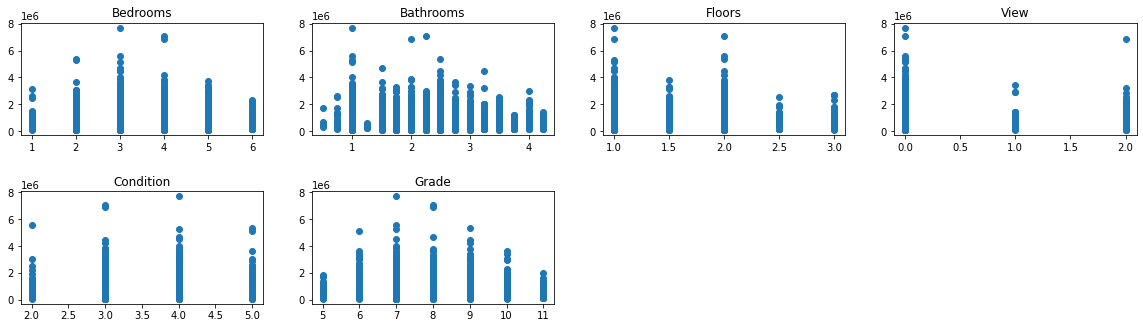

In [50]:
plt.figure(figsize=(20,30))
plt.subplots_adjust(hspace = 0.5)

for index, value in enumerate(ordinal_df_o):
    ax = plt.subplot(10, 4, index+1)
    ax.scatter(x=ordinal_df_o[value], y=df1['Price'][:20476])
    ax.set_title(value);

The scatter-plot shows good distribution of data among each categories.

In [51]:
ordinal_df_o.head()

,Bedrooms,Bathrooms,Floors,View,Condition,Grade
Id,,,,,,
7129300520,3,1.00,1.0,0.0,3,7
6414100192,3,2.25,2.0,0.0,3,7
5631500400,2,1.00,1.0,0.0,3,6
2487200875,4,3.00,1.0,0.0,5,7
1954400510,3,2.00,1.0,0.0,3,8


We will also have to reduce the variablity in 'DateSold', 'Yr_Built', and 'Zipcode'. For this, we will create ranges for each.

### Create ranges for categories

In [52]:
categorical_df.head()

,Date Sold,Bedrooms,Bathrooms,Floors,Waterfront,View,Condition,Grade,Yr_Built,Zipcode
Id,,,,,,,,,,
7129300520,10/13/2014,3,1.00,1.0,0.0,0.0,3,7,1955,98178
6414100192,12/9/2014,3,2.25,2.0,0.0,0.0,3,7,1951,98125
5631500400,2/25/2015,2,1.00,1.0,0.0,0.0,3,6,1933,98028
2487200875,12/9/2014,4,3.00,1.0,0.0,0.0,5,7,1965,98136
1954400510,2/18/2015,3,2.00,1.0,0.0,0.0,3,8,1987,98074


### Date Sold

In [53]:
date_df = categorical_df[['Date Sold', 'Yr_Built', 'Zipcode']].copy()

In [54]:
years = []
for i in date_df['Date Sold'].values:
    years.append(i[-4:])

In [55]:
date_df['Year_Sold'] = years

In [56]:
date_df.head()

,Date Sold,Yr_Built,Zipcode,Year_Sold
Id,,,,
7129300520,10/13/2014,1955,98178,2014
6414100192,12/9/2014,1951,98125,2014
5631500400,2/25/2015,1933,98028,2015
2487200875,12/9/2014,1965,98136,2014
1954400510,2/18/2015,1987,98074,2015


In [57]:
date_df.Year_Sold.value_counts()

2014    14622
2015     6975
Name: Year_Sold, dtype: int64

There only seems to be 2 years representing date sold. There are enough data on both so we will keep this for our model.

In [58]:
date_df.drop('Date Sold', axis=1, inplace=True)

### Year Built

In [59]:
date_df.Yr_Built.min()

1900

In [60]:
date_df.Yr_Built.max()

2015

In [61]:
diff = 2015 - 1900
diff

115

In [62]:
diff/10

11.5

If we group them by 10 years each, we will have about 10 columns. Let's create groups of 10.

In [63]:
Yr_Built_Range = ['2015-2006', '2005-1996', '1995-1986', '1985-1976', '1975-1966',
                  '1965-1956', '1955-1946', '1945-1936', '1935-1926', '1925 and below']

In [64]:
year_df = date_df.copy()

In [65]:
for i in year_df['Yr_Built']:
    if i > 2005:
        year_df['Yr_Built'].replace({i:'2015-2006'}, inplace=True)
    elif i <= 2005 & i > 1996:
        year_df['Yr_Built'].replace({i:'2005-1996'}, inplace=True)
    elif i <= 1995 & i > 1986:
        year_df['Yr_Built'].replace({i:'1995-1986'}, inplace=True)
    elif i <= 1985 & i > 1976:
        year_df['Yr_Built'].replace({i:'1985-1976'}, inplace=True)
    elif i <= 1975 & i > 1966:
        year_df['Yr_Built'].replace({i:'1975-1966'}, inplace=True)
    elif i <= 1965 & i > 1956:
        year_df['Yr_Built'].replace({i:'1965-1956'}, inplace=True)
    elif i <= 1955 & i > 1946:
        year_df['Yr_Built'].replace({i:'1955-1946'}, inplace=True)
    elif i <= 1945 & i > 1936:
        year_df['Yr_Built'].replace({i:'1945-1936'}, inplace=True)
    elif i <= 1935 & i > 1926:
        year_df['Yr_Built'].replace({i:'1935-1926'}, inplace=True)
    else:
        year_df['Yr_Built'].replace({i:'1925 and below'}, inplace=True)

In [66]:
year_df.Yr_Built.value_counts()

1925 and below    11400
2015-2006          2708
1975-1966          1546
2005-1996          1406
1995-1986          1112
1965-1956          1029
1955-1946          1018
1935-1926           619
1985-1976           456
1945-1936           303
Name: Yr_Built, dtype: int64

In [67]:
year_df.head()

,Yr_Built,Zipcode,Year_Sold
Id,,,
7129300520,1955-1946,98178,2014
6414100192,1925 and below,98125,2014
5631500400,1935-1926,98028,2015
2487200875,1965-1956,98136,2014
1954400510,1995-1986,98074,2015


### Zipcode

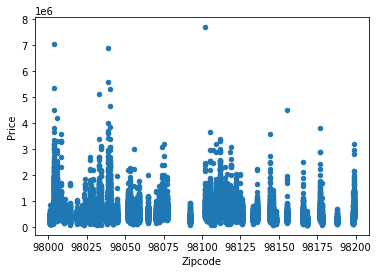

In [68]:
df1.plot.scatter('Zipcode', 'Price');

In [69]:
year_df.Zipcode.value_counts()

98103    602
98038    589
98115    583
98052    574
98117    553
        ... 
98102    104
98010    100
98024     80
98148     57
98039     50
Name: Zipcode, Length: 70, dtype: int64

There are about 70 zipcodes. We will keep these for now as each zipcode might contribute certain value to a house.

In [70]:
year_df.shape

(21597, 3)

Let's create dummy variables for these ranges before we merge them with ordinal columns.

### One-hot Encoding

In [71]:
column_names = year_df.columns.to_list()

In [72]:
cat_ohe = pd.get_dummies(year_df, columns=column_names, drop_first=True)

In [73]:
cat_ohe.head()

,Yr_Built_1935-1926,Yr_Built_1945-1936,Yr_Built_1955-1946,Yr_Built_1965-1956,Yr_Built_1975-1966,Yr_Built_1985-1976,Yr_Built_1995-1986,Yr_Built_2005-1996,Yr_Built_2015-2006,Zipcode_98002,...,Zipcode_98148,Zipcode_98155,Zipcode_98166,Zipcode_98168,Zipcode_98177,Zipcode_98178,Zipcode_98188,Zipcode_98198,Zipcode_98199,Year_Sold_2015
Id,,,,,,,,,,,,,,,,,,,,,
7129300520,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
6414100192,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5631500400,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2487200875,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1954400510,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1


We have 79 new columns, which are a separate instance for each variable within each category.

Let's merge this with the ordinal variables.

In [74]:
cat_df_final = pd.merge(ordinal_df_o, cat_ohe, how='inner', on='Id')

In [75]:
cat_df_final.head()

,Bedrooms,Bathrooms,Floors,View,Condition,Grade,Yr_Built_1935-1926,Yr_Built_1945-1936,Yr_Built_1955-1946,Yr_Built_1965-1956,...,Zipcode_98148,Zipcode_98155,Zipcode_98166,Zipcode_98168,Zipcode_98177,Zipcode_98178,Zipcode_98188,Zipcode_98198,Zipcode_98199,Year_Sold_2015
Id,,,,,,,,,,,,,,,,,,,,,
7129300520,3,1.00,1.0,0.0,3,7,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
6414100192,3,2.25,2.0,0.0,3,7,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5631500400,2,1.00,1.0,0.0,3,6,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2487200875,4,3.00,1.0,0.0,5,7,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1954400510,3,2.00,1.0,0.0,3,8,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [76]:
cat_df_final.shape

(20816, 85)

In [77]:
preprocessed = pd.merge(cont_df_final, cat_df_final, how='inner', on='Id')

In [78]:
preprocessed.head()

,Price,Sqft_Living,Sqft_Lot,Sqft_Above,Sqft_Living15,Sqft_Lot15,Bedrooms,Bathrooms,Floors,View,...,Zipcode_98148,Zipcode_98155,Zipcode_98166,Zipcode_98168,Zipcode_98177,Zipcode_98178,Zipcode_98188,Zipcode_98198,Zipcode_98199,Year_Sold_2015
Id,,,,,,,,,,,,,,,,,,,,,
7129300520,221900.0,1180,5650,1180,1340,5650,3,1.00,1.0,0.0,...,0,0,0,0,0,1,0,0,0,0
6414100192,538000.0,2570,7242,2170,1690,7639,3,2.25,2.0,0.0,...,0,0,0,0,0,0,0,0,0,0
5631500400,180000.0,770,10000,770,2720,8062,2,1.00,1.0,0.0,...,0,0,0,0,0,0,0,0,0,1
2487200875,604000.0,1960,5000,1050,1360,5000,4,3.00,1.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1954400510,510000.0,1680,8080,1680,1800,7503,3,2.00,1.0,0.0,...,0,0,0,0,0,0,0,0,0,1


In [79]:
preprocessed.shape

(20733, 91)

### Correlation Matrix

In [80]:
preprocessed.corr()

,Price,Sqft_Living,Sqft_Lot,Sqft_Above,Sqft_Living15,Sqft_Lot15,Bedrooms,Bathrooms,Floors,View,...,Zipcode_98148,Zipcode_98155,Zipcode_98166,Zipcode_98168,Zipcode_98177,Zipcode_98178,Zipcode_98188,Zipcode_98198,Zipcode_98199,Year_Sold_2015
Price,1.000000,0.627627,0.092889,0.529760,0.549149,0.082096,0.302281,0.458861,0.278297,0.199588,...,-0.042599,-0.053383,-0.042112,-0.131156,0.029715,-0.098923,-0.069658,-0.105885,0.107112,-0.002720
Sqft_Living,0.627627,1.000000,0.221136,0.848157,0.738889,0.218440,0.604538,0.715905,0.355811,0.143034,...,-0.021398,-0.041746,-0.005634,-0.087681,0.018031,-0.050485,-0.023635,-0.047807,0.005685,-0.032161
Sqft_Lot,0.092889,0.221136,1.000000,0.206684,0.261007,0.818308,0.101725,0.060449,-0.099802,0.029947,...,-0.004273,0.000997,0.021180,0.007281,-0.002978,-0.017524,0.000011,0.000159,-0.049527,-0.009609
Sqft_Above,0.529760,0.848157,0.206684,1.000000,0.718460,0.209578,0.478258,0.634409,0.545598,0.054117,...,-0.012878,-0.052491,-0.020936,-0.086081,-0.004775,-0.065922,-0.027525,-0.042676,-0.035911,-0.029875
Sqft_Living15,0.549149,0.738889,0.261007,0.718460,1.000000,0.284844,0.392422,0.536572,0.279490,0.152888,...,-0.024755,-0.055157,-0.017554,-0.096660,0.024545,-0.056511,-0.038443,-0.054333,-0.006360,-0.023032
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zipcode_98178,-0.098923,-0.050485,-0.017524,-0.065922,-0.056511,-0.012784,-0.007744,-0.061766,-0.061436,0.040412,...,-0.005857,-0.016839,-0.012496,-0.013946,-0.011815,1.000000,-0.009228,-0.013191,-0.013408,-0.007088
Zipcode_98188,-0.069658,-0.023635,0.000011,-0.027525,-0.038443,0.004290,0.004823,-0.032016,-0.038043,-0.007070,...,-0.004191,-0.012048,-0.008941,-0.009978,-0.008454,-0.009228,1.000000,-0.009438,-0.009593,0.008035
Zipcode_98198,-0.105885,-0.047807,0.000159,-0.042676,-0.054333,-0.005987,-0.014361,-0.052904,-0.055458,0.030073,...,-0.005990,-0.017222,-0.012780,-0.014264,-0.012084,-0.013191,-0.009438,1.000000,-0.013713,0.009245
Zipcode_98199,0.107112,0.005685,-0.049527,-0.035911,-0.006360,-0.052776,-0.023233,0.007316,-0.003565,0.050160,...,-0.006089,-0.017505,-0.012990,-0.014497,-0.012282,-0.013408,-0.009593,-0.013713,1.000000,0.002082


### Separating high correlated pairs

In [81]:
df2 = preprocessed.corr().abs().stack().reset_index().sort_values(0, ascending=False)

# zip the variable name columns (Which were only named level_0 and level_1 by default) in a new column named "pairs"
df2['pairs'] = list(zip(df2.level_0, df2.level_1))

# set index to pairs
df2.set_index(['pairs'], inplace = True)

#d rop level columns
df2.drop(columns=['level_1', 'level_0'], inplace = True)

# rename correlation column as cc rather than 0
df2.columns = ['cc']

# drop duplicates. This could be dangerous if you have variables perfectly correlated with variables other than themselves.
# for the sake of exercise, kept it in.
df2.drop_duplicates(inplace=True)

In [82]:
df2[(df2.cc>.7) & (df2.cc <1)]

,cc
pairs,
"(Sqft_Above, Sqft_Living)",0.848157
"(Sqft_Lot15, Sqft_Lot)",0.818308
"(Sqft_Living, Sqft_Living15)",0.738889
"(Sqft_Above, Sqft_Living15)",0.718460
"(Sqft_Living, Bathrooms)",0.715905
"(Grade, Sqft_Above)",0.710202
"(Grade, Sqft_Living)",0.709563


We are using 70% as there are many variables to choose from.

* From the above table, we can see that **Sqft_Above, Sqft_Lot15, Sqft_Living15,** and **Sqft_Living** are highly correlated.
* Removing **Sqft_Lot15** and **Sqft_Living15** makes sense as houses in the same area with the same square footage will have similar prices. 
* **Sqft_Above** and **Sqft_Living**, are one in the same so being highly correlated makes sense. Both of these variables are correlated with other variables, which means that they themselves are not adding much value in differentiating the underlying data. 

We will go ahead and remove these variables before moving on to the regression.

In [83]:
prep = preprocessed.drop(labels=['Sqft_Lot15', 'Sqft_Living15', 'Sqft_Above', 'Sqft_Living'], axis=1).copy()

In [84]:
prep.head()

,Price,Sqft_Lot,Bedrooms,Bathrooms,Floors,View,Condition,Grade,Yr_Built_1935-1926,Yr_Built_1945-1936,...,Zipcode_98148,Zipcode_98155,Zipcode_98166,Zipcode_98168,Zipcode_98177,Zipcode_98178,Zipcode_98188,Zipcode_98198,Zipcode_98199,Year_Sold_2015
Id,,,,,,,,,,,,,,,,,,,,,
7129300520,221900.0,5650,3,1.00,1.0,0.0,3,7,0,0,...,0,0,0,0,0,1,0,0,0,0
6414100192,538000.0,7242,3,2.25,2.0,0.0,3,7,0,0,...,0,0,0,0,0,0,0,0,0,0
5631500400,180000.0,10000,2,1.00,1.0,0.0,3,6,1,0,...,0,0,0,0,0,0,0,0,0,1
2487200875,604000.0,5000,4,3.00,1.0,0.0,5,7,0,0,...,0,0,0,0,0,0,0,0,0,0
1954400510,510000.0,8080,3,2.00,1.0,0.0,3,8,0,0,...,0,0,0,0,0,0,0,0,0,1


### Running the correlation matrix again

In [85]:
df3 = prep.corr().abs().stack().reset_index().sort_values(0, ascending=False)

# zip the variable name columns (Which were only named level_0 and level_1 by default) in a new column named "pairs"
df3['pairs'] = list(zip(df3.level_0, df3.level_1))

# set index to pairs
df3.set_index(['pairs'], inplace = True)

#d rop level columns
df3.drop(columns=['level_1', 'level_0'], inplace = True)

# rename correlation column as cc rather than 0
df3.columns = ['cc']

# drop duplicates. This could be dangerous if you have variables perfectly correlated with variables other than themselves.
# for the sake of exercise, kept it in.
df3.drop_duplicates(inplace=True)

In [86]:
df3[(df3.cc>.7) & (df3.cc <1)]

,cc
pairs,


Our data seems to be good for multicollinearity of less than .7

### Run a Multi-linear model

In [87]:
X = prep.drop('Price', axis=1)
y = prep['Price']

In [88]:
import statsmodels.api as sm

X_int = sm.add_constant(X)
model = sm.OLS(y,X_int).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.777
Model:                            OLS   Adj. R-squared:                  0.776
Method:                 Least Squares   F-statistic:                     834.2
Date:                Sun, 11 Apr 2021   Prob (F-statistic):               0.00
Time:                        21:24:48   Log-Likelihood:            -2.7042e+05
No. Observations:               20733   AIC:                         5.410e+05
Df Residuals:                   20646   BIC:                         5.417e+05
Df Model:                          86                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const              -6.817e+05   1.05e+04    -65.008      0.000   -7.02e+05   -6.61e+05
Sqft_Lot               1.7021      0.079     21.482      0.000       1.547       1.857
Bedrooms            2.762e+04   1088.261     25.378      0.000    2.55e+04    2.98e+04
Bathrooms           4.735e+04   1725.871     27.438      0.000     4.4e+04    5.07e+04
Floors             -1.252e+04   2073.127     -6.040      0.000   -1.66e+04   -8458.164
View                5.209e+04   1993.671     26.127      0.000    4.82e+04     5.6e+04
Condition           2.691e+04   1330.180     20.230      0.000    2.43e+04    2.95e+04
Grade               9.259e+04   1115.134     83.034      0.000    9.04e+04    9.48e+04
Yr_Built_1935-1926  2.551e+04   4947.202      5.156      0.000    1.58e+04    3.52e+04
Yr_Built_1945-1936  2.134e+04   6511.078      3.277      0.001    8574.539    3.41e+04
Yr_Built_1955-1946 -1.731e+04   3832.924     -4.516      0.000   -2.48e+04   -9797.793
Yr_Built_1965-1956 -2.279e+04   3829.358     -5.952      0.000   -3.03e+04   -1.53e+04
Yr_Built_1975-1966 -2.484e+04   3223.473     -7.705      0.000   -3.12e+04   -1.85e+04
Yr_Built_1985-1976 -1.758e+04   5581.475     -3.150      0.002   -2.85e+04   -6640.051
Yr_Built_1995-1986 -2.235e+04   3808.089     -5.870      0.000   -2.98e+04   -1.49e+04
Yr_Built_2005-1996 -1.567e+04   3726.357     -4.206      0.000    -2.3e+04   -8367.286
Yr_Built_2015-2006 -1.419e+04   3046.332     -4.659      0.000   -2.02e+04   -8220.986
Zipcode_98002       2.072e+04   9743.168      2.126      0.033    1619.453    3.98e+04
Zipcode_98003      -7848.1144   8763.857     -0.896      0.371    -2.5e+04    9329.737
Zipcode_98004       6.434e+05   9507.230     67.675      0.000    6.25e+05    6.62e+05
Zipcode_98005       3.474e+05   1.09e+04     31.911      0.000    3.26e+05    3.69e+05
Zipcode_98006       2.797e+05   8145.323     34.339      0.000    2.64e+05    2.96e+05
Zipcode_98007        2.51e+05   1.09e+04     22.941      0.000     2.3e+05    2.72e+05
Zipcode_98008       2.353e+05   9171.776     25.656      0.000    2.17e+05    2.53e+05
Zipcode_98010       1.037e+05   1.39e+04      7.454      0.000    7.64e+04    1.31e+05
Zipcode_98011       1.598e+05   9934.370     16.084      0.000     1.4e+05    1.79e+05
Zipcode_98014       1.124e+05   1.32e+04      8.542      0.000    8.66e+04    1.38e+05
Zipcode_98019       1.116e+05   1.05e+04     10.617      0.000     9.1e+04    1.32e+05
Zipcode_98022       1523.0158   1.04e+04      0.147      0.883   -1.88e+04    2.19e+04
Zipcode_98023       -2.11e+04   7634.864     -2.763      0.006   -3.61e+04   -6131.253
Zipcode_98024       1.305e+05   1.65e+04      7.900      0.000    9.81e+04    1.63e+05
Zipcode_98027       1.966e+05   8311.168     23.656      0.000     1.8e+05    2.13e+05
Zipcode_98028       1.398e+05   8891.7

Keeping a significance level of 5%, we can see some variables which are statistically insignificant to this regression model.

We can manually exclude any variable with p-value greater than .05.

In [89]:
p_values = pd.DataFrame(model.pvalues)

In [90]:
p_values

,0
const,0.000000e+00
Sqft_Lot,2.921060e-101
Bedrooms,6.107601e-140
Bathrooms,8.093098e-163
Floors,1.567663e-09
...,...
Zipcode_98178,2.928007e-12
Zipcode_98188,4.878304e-05
Zipcode_98198,5.440615e-03
Zipcode_98199,0.000000e+00


In [91]:
insignificant = p_values[p_values > .05]

In [92]:
insignificant.dropna(axis=0, inplace=True)

In [93]:
insignificant

,0
Zipcode_98003,0.370525
Zipcode_98022,0.883489
Zipcode_98030,0.489705
Zipcode_98031,0.523614
Zipcode_98032,0.585373
Zipcode_98042,0.344372


In [94]:
insignificant_cols = list(insignificant.index)

In [95]:
insignificant_cols

['Zipcode_98003',
 'Zipcode_98022',
 'Zipcode_98030',
 'Zipcode_98031',
 'Zipcode_98032',
 'Zipcode_98042']

In [96]:
preprocessed2 = prep.drop(insignificant_cols, axis=1)

Running the model again

In [97]:
X2 = preprocessed2.drop('Price', axis = 1)
y2 = preprocessed2['Price']

In [98]:
import statsmodels.api as sm

X2_int = sm.add_constant(X2)
model = sm.OLS(y2,X2_int).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.776
Model:                            OLS   Adj. R-squared:                  0.776
Method:                 Least Squares   F-statistic:                     896.7
Date:                Sun, 11 Apr 2021   Prob (F-statistic):               0.00
Time:                        21:24:48   Log-Likelihood:            -2.7042e+05
No. Observations:               20733   AIC:                         5.410e+05
Df Residuals:                   20652   BIC:                         5.417e+05
Df Model:                          80                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const              -6.799e+05   9181.806    -74.052      0.000   -6.98e+05   -6.62e+05
Sqft_Lot               1.7065      0.079     21.598      0.000       1.552       1.861
Bedrooms            2.763e+04   1087.807     25.400      0.000    2.55e+04    2.98e+04
Bathrooms           4.744e+04   1724.413     27.512      0.000    4.41e+04    5.08e+04
Floors              -1.24e+04   2072.088     -5.986      0.000   -1.65e+04   -8341.489
View                5.197e+04   1990.524     26.111      0.000    4.81e+04    5.59e+04
Condition             2.7e+04   1327.015     20.343      0.000    2.44e+04    2.96e+04
Grade               9.252e+04   1113.847     83.063      0.000    9.03e+04    9.47e+04
Yr_Built_1935-1926  2.554e+04   4946.097      5.163      0.000    1.58e+04    3.52e+04
Yr_Built_1945-1936  2.121e+04   6510.477      3.257      0.001    8444.468     3.4e+04
Yr_Built_1955-1946 -1.737e+04   3832.104     -4.532      0.000   -2.49e+04   -9855.209
Yr_Built_1965-1956 -2.302e+04   3827.485     -6.013      0.000   -3.05e+04   -1.55e+04
Yr_Built_1975-1966 -2.486e+04   3215.245     -7.732      0.000   -3.12e+04   -1.86e+04
Yr_Built_1985-1976  -1.75e+04   5576.093     -3.138      0.002   -2.84e+04   -6566.104
Yr_Built_1995-1986 -2.223e+04   3803.503     -5.844      0.000   -2.97e+04   -1.48e+04
Yr_Built_2005-1996 -1.553e+04   3723.300     -4.170      0.000   -2.28e+04   -8228.471
Yr_Built_2015-2006 -1.401e+04   3041.195     -4.608      0.000      -2e+04   -8053.096
Zipcode_98002       1.867e+04   8192.686      2.279      0.023    2614.452    3.47e+04
Zipcode_98004       6.415e+05   7909.670     81.097      0.000    6.26e+05    6.57e+05
Zipcode_98005       3.454e+05   9513.438     36.310      0.000    3.27e+05    3.64e+05
Zipcode_98006       2.777e+05   6179.464     44.943      0.000    2.66e+05     2.9e+05
Zipcode_98007        2.49e+05   9567.154     26.027      0.000     2.3e+05    2.68e+05
Zipcode_98008       2.334e+05   7485.960     31.180      0.000    2.19e+05    2.48e+05
Zipcode_98010       1.016e+05   1.29e+04      7.889      0.000    7.64e+04    1.27e+05
Zipcode_98011       1.578e+05   8413.159     18.753      0.000    1.41e+05    1.74e+05
Zipcode_98014       1.103e+05   1.21e+04      9.143      0.000    8.67e+04    1.34e+05
Zipcode_98019       1.095e+05   9101.840     12.027      0.000    9.16e+04    1.27e+05
Zipcode_98023      -2.308e+04   5500.436     -4.195      0.000   -3.39e+04   -1.23e+04
Zipcode_98024       1.284e+05   1.57e+04      8.196      0.000    9.77e+04    1.59e+05
Zipcode_98027       1.945e+05   6435.671     30.222      0.000    1.82e+05    2.07e+05
Zipcode_98028       1.378e+05   7162.807     19.235      0.000    1.24e+05    1.52e+05
Zipcode_98029       2.161e+05   6871.547     31.442      0.000    2.03e+05     2.3e+05
Zipcode_98033       3.652e+05   6135.0

Based on our data and keeping level of significance at 95%, our final model consists of 80 independent variables. We know that 64 of these are from the various Zipcodes, which could have significant impact on house prices.

The model summary shows a R-square of 0.776 which is pretty good. This means that our base model is able to explain or account for 77.6% of variability present in our target variable. High variability or R-square could also be an indication of overfitting. We can check that through Cross-Validation as shown below. 

We can now go and cross-validate the model to check for underfitting or overfitting.

### Cross-Validation

In [99]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X2, y2, test_size=0.20)

from sklearn.linear_model import LinearRegression
linreg = LinearRegression()

linreg.fit(X_train, y_train)
y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

from sklearn.metrics import mean_squared_error
mse_train = mean_squared_error(y_train, y_hat_train)
mse_test = mean_squared_error(y_test, y_hat_test)

print(mse_train)
print(mse_test)

12487929339.035244
12574093440.5811


In [100]:
def kfolds(data, k):
    
    data = pd.DataFrame(data)
    num_observations = len(data)
    fold_size = num_observations//k
    leftovers = num_observations%k
    folds = []
    start_obs = 0
    for fold_n in range(1,k+1):
        if fold_n <= leftovers:
            #Fold Size will be 1 larger to account for leftovers
            fold =  data.iloc[start_obs : start_obs+fold_size+1] 
            folds.append(fold)
            start_obs +=  fold_size + 1
        else:
            fold =  data.iloc[start_obs : start_obs+fold_size] 
            folds.append(fold)
            start_obs +=  fold_size
            
    return folds 

In [101]:
data = pd.concat([X2, y2], axis=1)
folds = kfolds(data, 5)

In [102]:
test_errs = []
train_errs = []
k=5

for n in range(k):
    # Split in train and test for the fold
    train = pd.concat([fold for i, fold in enumerate(folds) if i!=n])
    test = folds[n]
    # Fit a linear regression model
    linreg.fit(X_train, y_train)
    #Evaluate Train and Test Errors
    y_hat_train = linreg.predict(X_train)
    y_hat_test = linreg.predict(X_test)
    train_residuals = y_hat_train - y_train
    test_residuals = y_hat_test - y_test
    train_errs.append(np.mean(train_residuals.astype(float)**2))
    test_errs.append(np.mean(test_residuals.astype(float)**2))
print(train_errs)
print(test_errs)

[12487929339.035213, 12487929339.035213, 12487929339.035213, 12487929339.035213, 12487929339.035213]
[12574093440.581144, 12574093440.581144, 12574093440.581144, 12574093440.581144, 12574093440.581144]


In [103]:
print('Train MSE:')
print(train_errs)
print('Train RMSE:')
print(np.sqrt(train_errs), '\n')
print('Test MSE:')
print(test_errs)
print('Test RMSE:')
print(np.sqrt(test_errs))

Train MSE:
[12487929339.035213, 12487929339.035213, 12487929339.035213, 12487929339.035213, 12487929339.035213]
Train RMSE:
[111749.40419991 111749.40419991 111749.40419991 111749.40419991
 111749.40419991] 

Test MSE:
[12574093440.581144, 12574093440.581144, 12574093440.581144, 12574093440.581144, 12574093440.581144]
Test RMSE:
[112134.26523851 112134.26523851 112134.26523851 112134.26523851
 112134.26523851]


The test error is slightly higher than our train error. This confirms that the model is a good fit.

### Base Model

In [104]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.776
Model:                            OLS   Adj. R-squared:                  0.776
Method:                 Least Squares   F-statistic:                     896.7
Date:                Sun, 11 Apr 2021   Prob (F-statistic):               0.00
Time:                        21:24:49   Log-Likelihood:            -2.7042e+05
No. Observations:               20733   AIC:                         5.410e+05
Df Residuals:                   20652   BIC:                         5.417e+05
Df Model:                          80                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const              -6.799e+05   9181.806    -74.052      0.000   -6.98e+05   -6.62e+05
Sqft_Lot               1.7065      0.079     21.598      0.000       1.552       1.861
Bedrooms            2.763e+04   1087.807     25.400      0.000    2.55e+04    2.98e+04
Bathrooms           4.744e+04   1724.413     27.512      0.000    4.41e+04    5.08e+04
Floors              -1.24e+04   2072.088     -5.986      0.000   -1.65e+04   -8341.489
View                5.197e+04   1990.524     26.111      0.000    4.81e+04    5.59e+04
Condition             2.7e+04   1327.015     20.343      0.000    2.44e+04    2.96e+04
Grade               9.252e+04   1113.847     83.063      0.000    9.03e+04    9.47e+04
Yr_Built_1935-1926  2.554e+04   4946.097      5.163      0.000    1.58e+04    3.52e+04
Yr_Built_1945-1936  2.121e+04   6510.477      3.257      0.001    8444.468     3.4e+04
Yr_Built_1955-1946 -1.737e+04   3832.104     -4.532      0.000   -2.49e+04   -9855.209
Yr_Built_1965-1956 -2.302e+04   3827.485     -6.013      0.000   -3.05e+04   -1.55e+04
Yr_Built_1975-1966 -2.486e+04   3215.245     -7.732      0.000   -3.12e+04   -1.86e+04
Yr_Built_1985-1976  -1.75e+04   5576.093     -3.138      0.002   -2.84e+04   -6566.104
Yr_Built_1995-1986 -2.223e+04   3803.503     -5.844      0.000   -2.97e+04   -1.48e+04
Yr_Built_2005-1996 -1.553e+04   3723.300     -4.170      0.000   -2.28e+04   -8228.471
Yr_Built_2015-2006 -1.401e+04   3041.195     -4.608      0.000      -2e+04   -8053.096
Zipcode_98002       1.867e+04   8192.686      2.279      0.023    2614.452    3.47e+04
Zipcode_98004       6.415e+05   7909.670     81.097      0.000    6.26e+05    6.57e+05
Zipcode_98005       3.454e+05   9513.438     36.310      0.000    3.27e+05    3.64e+05
Zipcode_98006       2.777e+05   6179.464     44.943      0.000    2.66e+05     2.9e+05
Zipcode_98007        2.49e+05   9567.154     26.027      0.000     2.3e+05    2.68e+05
Zipcode_98008       2.334e+05   7485.960     31.180      0.000    2.19e+05    2.48e+05
Zipcode_98010       1.016e+05   1.29e+04      7.889      0.000    7.64e+04    1.27e+05
Zipcode_98011       1.578e+05   8413.159     18.753      0.000    1.41e+05    1.74e+05
Zipcode_98014       1.103e+05   1.21e+04      9.143      0.000    8.67e+04    1.34e+05
Zipcode_98019       1.095e+05   9101.840     12.027      0.000    9.16e+04    1.27e+05
Zipcode_98023      -2.308e+04   5500.436     -4.195      0.000   -3.39e+04   -1.23e+04
Zipcode_98024       1.284e+05   1.57e+04      8.196      0.000    9.77e+04    1.59e+05
Zipcode_98027       1.945e+05   6435.671     30.222      0.000    1.82e+05    2.07e+05
Zipcode_98028       1.378e+05   7162.807     19.235      0.000    1.24e+05    1.52e+05
Zipcode_98029       2.161e+05   6871.547     31.442      0.000    2.03e+05     2.3e+05
Zipcode_98033       3.652e+05   6135.0

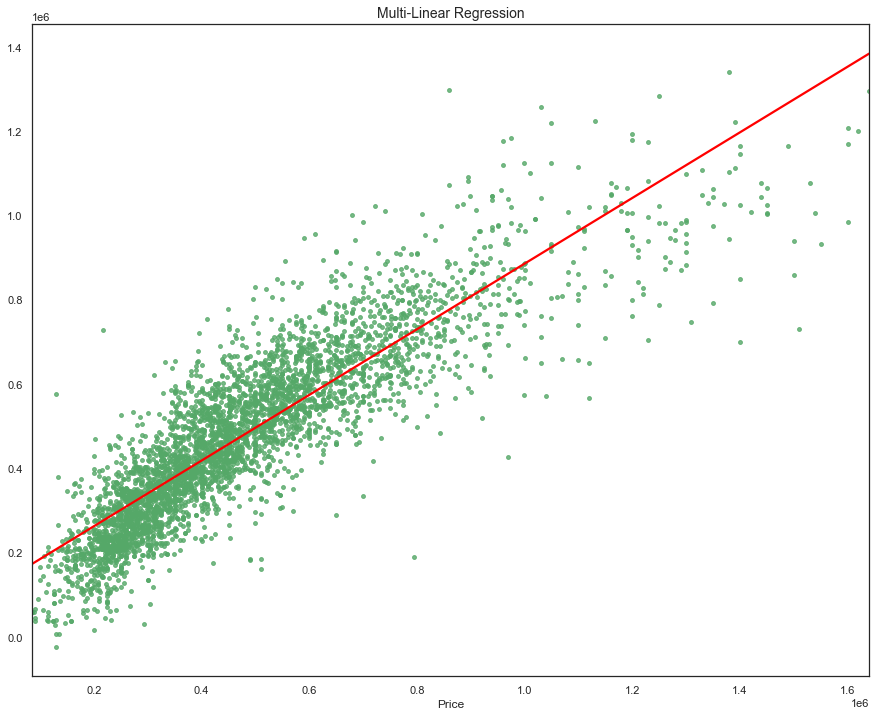

In [105]:
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

plt.figure(figsize=(15,12))
sns.set(style='white', color_codes=True)
sns.regplot(y_test, y=y_hat_test, ci=None,  scatter_kws={'s': 15, 'color':'g'}, line_kws={'color': 'red'})

plt.title('Multi-Linear Regression', fontsize=14);

Looking at the above plot, the linear regression line seems to have accounted for a lot of outlying 'Price' variables. You can see that the data starts to get sparse after 1.0 or a million dollar mark.

Let's try to re-do the model with Price over 1 million removed.

### Model Iteration 1:

In [106]:
preprocessed2.head()

,Price,Sqft_Lot,Bedrooms,Bathrooms,Floors,View,Condition,Grade,Yr_Built_1935-1926,Yr_Built_1945-1936,...,Zipcode_98148,Zipcode_98155,Zipcode_98166,Zipcode_98168,Zipcode_98177,Zipcode_98178,Zipcode_98188,Zipcode_98198,Zipcode_98199,Year_Sold_2015
Id,,,,,,,,,,,,,,,,,,,,,
7129300520,221900.0,5650,3,1.00,1.0,0.0,3,7,0,0,...,0,0,0,0,0,1,0,0,0,0
6414100192,538000.0,7242,3,2.25,2.0,0.0,3,7,0,0,...,0,0,0,0,0,0,0,0,0,0
5631500400,180000.0,10000,2,1.00,1.0,0.0,3,6,1,0,...,0,0,0,0,0,0,0,0,0,1
2487200875,604000.0,5000,4,3.00,1.0,0.0,5,7,0,0,...,0,0,0,0,0,0,0,0,0,0
1954400510,510000.0,8080,3,2.00,1.0,0.0,3,8,0,0,...,0,0,0,0,0,0,0,0,0,1


In [107]:
preprocessed3 = preprocessed2[preprocessed2['Price'] < 1000000]

In [108]:
preprocessed3.shape

(20043, 81)

### Linear Regression

In [109]:
X3 = preprocessed3.drop('Price', axis=1)
y3 = preprocessed3['Price']

In [110]:
X3_int = sm.add_constant(X3)
model = sm.OLS(y3,X3_int).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.773
Model:                            OLS   Adj. R-squared:                  0.773
Method:                 Least Squares   F-statistic:                     851.7
Date:                Sun, 11 Apr 2021   Prob (F-statistic):               0.00
Time:                        21:24:50   Log-Likelihood:            -2.5743e+05
No. Observations:               20043   AIC:                         5.150e+05
Df Residuals:                   19962   BIC:                         5.157e+05
Df Model:                          80                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const              -5.383e+05   7832.098    -68.731      0.000   -5.54e+05   -5.23e+05
Sqft_Lot               1.5244      0.066     23.090      0.000       1.395       1.654
Bedrooms            2.661e+04    908.664     29.290      0.000    2.48e+04    2.84e+04
Bathrooms           3.795e+04   1451.584     26.146      0.000    3.51e+04    4.08e+04
Floors             -8277.0140   1741.336     -4.753      0.000   -1.17e+04   -4863.852
View                4.133e+04   1741.203     23.736      0.000    3.79e+04    4.47e+04
Condition           2.399e+04   1111.550     21.584      0.000    2.18e+04    2.62e+04
Grade               7.726e+04    953.713     81.006      0.000    7.54e+04    7.91e+04
Yr_Built_1935-1926  2.719e+04   4153.926      6.545      0.000     1.9e+04    3.53e+04
Yr_Built_1945-1936  1.208e+04   5390.808      2.241      0.025    1516.271    2.26e+04
Yr_Built_1955-1946 -1.465e+04   3196.754     -4.582      0.000   -2.09e+04   -8380.519
Yr_Built_1965-1956 -1.987e+04   3172.686     -6.261      0.000   -2.61e+04   -1.36e+04
Yr_Built_1975-1966 -2.547e+04   2671.107     -9.535      0.000   -3.07e+04   -2.02e+04
Yr_Built_1985-1976 -1.688e+04   4642.085     -3.636      0.000    -2.6e+04   -7780.727
Yr_Built_1995-1986 -1.363e+04   3167.440     -4.303      0.000   -1.98e+04   -7419.601
Yr_Built_2005-1996 -1.431e+04   3124.383     -4.579      0.000   -2.04e+04   -8183.196
Yr_Built_2015-2006  -1.29e+04   2565.676     -5.028      0.000   -1.79e+04   -7871.739
Zipcode_98002       6893.8572   6717.300      1.026      0.305   -6272.607    2.01e+04
Zipcode_98004       5.064e+05   8233.563     61.504      0.000     4.9e+05    5.23e+05
Zipcode_98005       3.431e+05   8146.467     42.114      0.000    3.27e+05    3.59e+05
Zipcode_98006       2.775e+05   5194.700     53.418      0.000    2.67e+05    2.88e+05
Zipcode_98007       2.444e+05   7991.163     30.584      0.000    2.29e+05     2.6e+05
Zipcode_98008       2.349e+05   6159.179     38.144      0.000    2.23e+05    2.47e+05
Zipcode_98010       9.877e+04   1.06e+04      9.356      0.000    7.81e+04    1.19e+05
Zipcode_98011       1.629e+05   6912.258     23.567      0.000    1.49e+05    1.76e+05
Zipcode_98014       1.099e+05   9892.645     11.110      0.000    9.05e+04    1.29e+05
Zipcode_98019       1.117e+05   7460.457     14.978      0.000    9.71e+04    1.26e+05
Zipcode_98023      -2.099e+04   4508.647     -4.656      0.000   -2.98e+04   -1.22e+04
Zipcode_98024       1.245e+05   1.28e+04      9.693      0.000    9.93e+04     1.5e+05
Zipcode_98027       2.015e+05   5320.118     37.878      0.000    1.91e+05    2.12e+05
Zipcode_98028       1.417e+05   5879.982     24.095      0.000     1.3e+05    1.53e+05
Zipcode_98029        2.24e+05   5682.331     39.426      0.000    2.13e+05    2.35e+05
Zipcode_98033       3.162e+05   5392.5

We have r-squared value of 0.773, which is pretty good.

### Model Validation

In [111]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X3, y3, test_size=0.20)

from sklearn.linear_model import LinearRegression
linreg = LinearRegression()

linreg.fit(X_train, y_train)
y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

from sklearn.metrics import mean_squared_error
mse_train = mean_squared_error(y_train, y_hat_train)
mse_test = mean_squared_error(y_test, y_hat_test)

print(mse_train)
print(mse_test)

8356936817.169501
8568895130.060224


### Visualize the model

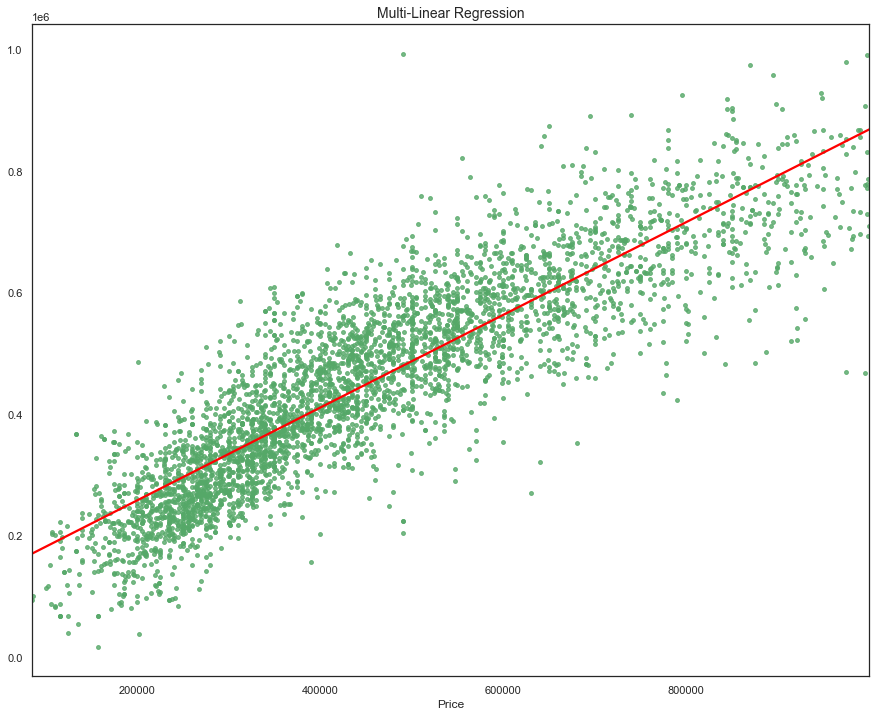

In [112]:
plt.figure(figsize=(15,12))
sns.set(style='white', color_codes=True)
sns.regplot(y_test, y=y_hat_test, ci=None,  scatter_kws={'s': 15, 'color':'g'}, line_kws={'color': 'red'})

plt.title('Multi-Linear Regression', fontsize=14);

This looks to be a better fit than last time

### K-Folds Confirmation

In [113]:
data = pd.concat([X3, y3], axis=1)
folds = kfolds(data, 5)

In [114]:
test_errs2 = []
train_errs2 = []
k=5

for n in range(k):
    # Split in train and test for the fold
    train = pd.concat([fold for i, fold in enumerate(folds) if i!=n])
    test = folds[n]
    # Fit a linear regression model
    linreg.fit(X_train, y_train)
    #Evaluate Train and Test Errors
    y_hat_train = linreg.predict(X_train)
    y_hat_test = linreg.predict(X_test)
    train_residuals = y_hat_train - y_train
    test_residuals = y_hat_test - y_test
    train_errs2.append(np.mean(train_residuals.astype(float)**2))
    test_errs2.append(np.mean(test_residuals.astype(float)**2))
print(train_errs2)
print(test_errs2)

[8356936817.169492, 8356936817.169492, 8356936817.169492, 8356936817.169492, 8356936817.169492]
[8568895130.060212, 8568895130.060212, 8568895130.060212, 8568895130.060212, 8568895130.060212]


In [115]:
print('Train MSE:')
print(train_errs2)
print('Train RMSE:')
print(np.sqrt(train_errs2), '\n')
print('Test MSE:')
print(test_errs2)
print('Test RMSE:')
print(np.sqrt(test_errs2))

Train MSE:
[8356936817.169492, 8356936817.169492, 8356936817.169492, 8356936817.169492, 8356936817.169492]
Train RMSE:
[91416.28310738 91416.28310738 91416.28310738 91416.28310738
 91416.28310738] 

Test MSE:
[8568895130.060212, 8568895130.060212, 8568895130.060212, 8568895130.060212, 8568895130.060212]
Test RMSE:
[92568.32681895 92568.32681895 92568.32681895 92568.32681895
 92568.32681895]


The test MSE here is slightly lower than test MSE, which suggests that the model is a good fit.

### Final Model

In [116]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.773
Model:                            OLS   Adj. R-squared:                  0.773
Method:                 Least Squares   F-statistic:                     851.7
Date:                Sun, 11 Apr 2021   Prob (F-statistic):               0.00
Time:                        21:24:51   Log-Likelihood:            -2.5743e+05
No. Observations:               20043   AIC:                         5.150e+05
Df Residuals:                   19962   BIC:                         5.157e+05
Df Model:                          80                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const              -5.383e+05   7832.098    -68.731      0.000   -5.54e+05   -5.23e+05
Sqft_Lot               1.5244      0.066     23.090      0.000       1.395       1.654
Bedrooms            2.661e+04    908.664     29.290      0.000    2.48e+04    2.84e+04
Bathrooms           3.795e+04   1451.584     26.146      0.000    3.51e+04    4.08e+04
Floors             -8277.0140   1741.336     -4.753      0.000   -1.17e+04   -4863.852
View                4.133e+04   1741.203     23.736      0.000    3.79e+04    4.47e+04
Condition           2.399e+04   1111.550     21.584      0.000    2.18e+04    2.62e+04
Grade               7.726e+04    953.713     81.006      0.000    7.54e+04    7.91e+04
Yr_Built_1935-1926  2.719e+04   4153.926      6.545      0.000     1.9e+04    3.53e+04
Yr_Built_1945-1936  1.208e+04   5390.808      2.241      0.025    1516.271    2.26e+04
Yr_Built_1955-1946 -1.465e+04   3196.754     -4.582      0.000   -2.09e+04   -8380.519
Yr_Built_1965-1956 -1.987e+04   3172.686     -6.261      0.000   -2.61e+04   -1.36e+04
Yr_Built_1975-1966 -2.547e+04   2671.107     -9.535      0.000   -3.07e+04   -2.02e+04
Yr_Built_1985-1976 -1.688e+04   4642.085     -3.636      0.000    -2.6e+04   -7780.727
Yr_Built_1995-1986 -1.363e+04   3167.440     -4.303      0.000   -1.98e+04   -7419.601
Yr_Built_2005-1996 -1.431e+04   3124.383     -4.579      0.000   -2.04e+04   -8183.196
Yr_Built_2015-2006  -1.29e+04   2565.676     -5.028      0.000   -1.79e+04   -7871.739
Zipcode_98002       6893.8572   6717.300      1.026      0.305   -6272.607    2.01e+04
Zipcode_98004       5.064e+05   8233.563     61.504      0.000     4.9e+05    5.23e+05
Zipcode_98005       3.431e+05   8146.467     42.114      0.000    3.27e+05    3.59e+05
Zipcode_98006       2.775e+05   5194.700     53.418      0.000    2.67e+05    2.88e+05
Zipcode_98007       2.444e+05   7991.163     30.584      0.000    2.29e+05     2.6e+05
Zipcode_98008       2.349e+05   6159.179     38.144      0.000    2.23e+05    2.47e+05
Zipcode_98010       9.877e+04   1.06e+04      9.356      0.000    7.81e+04    1.19e+05
Zipcode_98011       1.629e+05   6912.258     23.567      0.000    1.49e+05    1.76e+05
Zipcode_98014       1.099e+05   9892.645     11.110      0.000    9.05e+04    1.29e+05
Zipcode_98019       1.117e+05   7460.457     14.978      0.000    9.71e+04    1.26e+05
Zipcode_98023      -2.099e+04   4508.647     -4.656      0.000   -2.98e+04   -1.22e+04
Zipcode_98024       1.245e+05   1.28e+04      9.693      0.000    9.93e+04     1.5e+05
Zipcode_98027       2.015e+05   5320.118     37.878      0.000    1.91e+05    2.12e+05
Zipcode_98028       1.417e+05   5879.982     24.095      0.000     1.3e+05    1.53e+05
Zipcode_98029        2.24e+05   5682.331     39.426      0.000    2.13e+05    2.35e+05
Zipcode_98033       3.162e+05   5392.5

In [117]:
parameters = pd.DataFrame(model.params)

In [118]:
params = parameters.transpose()

In [119]:
params

,const,Sqft_Lot,Bedrooms,Bathrooms,Floors,View,Condition,Grade,Yr_Built_1935-1926,Yr_Built_1945-1936,...,Zipcode_98148,Zipcode_98155,Zipcode_98166,Zipcode_98168,Zipcode_98177,Zipcode_98178,Zipcode_98188,Zipcode_98198,Zipcode_98199,Year_Sold_2015
0,-538306.669521,1.524419,26614.384863,37953.488019,-8277.013983,41329.106574,23991.74398,77256.927452,27188.941476,12082.700575,...,51517.770191,137223.372817,109798.054233,54359.400459,222298.672166,51753.154091,35338.380124,16843.782403,334197.802069,18713.141017


In [156]:
zipcodes = parameters[17:-1:]

In [157]:
zipcodes

,0
Zipcode_98002,6893.857187
Zipcode_98004,506397.070026
Zipcode_98005,343084.119980
Zipcode_98006,277492.141025
Zipcode_98007,244398.500850
...,...
Zipcode_98177,222298.672166
Zipcode_98178,51753.154091
Zipcode_98188,35338.380124
Zipcode_98198,16843.782403


In [155]:
top_5_zipcodes = zipcodes.sort_values(by=0, ascending=False)[:5]

In [159]:
top_5_zipcodes

,0
Zipcode_98039,667730.526640
Zipcode_98004,506397.070026
Zipcode_98040,432425.185728
Zipcode_98112,403855.460141
Zipcode_98109,381402.213823


In [158]:
least_5_zipcodes = zipcodes.sort_values(by=0, ascending=True)[:5]

In [160]:
least_5_zipcodes

,0
Zipcode_98023,-20990.067464
Zipcode_98092,-19720.484669
Zipcode_98002,6893.857187
Zipcode_98198,16843.782403
Zipcode_98058,33922.700581


### Predict House Price

In [120]:
random_house = preprocessed2.sample()

In [121]:
random_house

,Price,Sqft_Lot,Bedrooms,Bathrooms,Floors,View,Condition,Grade,Yr_Built_1935-1926,Yr_Built_1945-1936,...,Zipcode_98148,Zipcode_98155,Zipcode_98166,Zipcode_98168,Zipcode_98177,Zipcode_98178,Zipcode_98188,Zipcode_98198,Zipcode_98199,Year_Sold_2015
Id,,,,,,,,,,,,,,,,,,,,,
1623300765,469000.0,4400,2,1.0,1.0,0.0,3,7,0,0,...,0,0,0,0,0,0,0,0,0,0


In [122]:
Index = random_house.index.to_list()

In [123]:
Id = Index[0]

In [124]:
random_house.transpose().sort_values(by=Id, ascending=False)[:10]

Id,1623300765
Price,469000.0
Sqft_Lot,4400.0
Grade,7.0
Condition,3.0
Bedrooms,2.0
Zipcode_98117,1.0
Bathrooms,1.0
Floors,1.0
Zipcode_98072,0.0
Zipcode_98106,0.0


In [128]:
sample_house = params.const + (params.Sqft_Lot * 4400) + (7 * params.Grade) + \
                               (2 * params.Bedrooms) + (1 * params.Bathrooms) + \
                               (1 * params.Floors) + (3 * params.Condition) + (1 * params['Zipcode_98117'])

In [129]:
price = sample_house[0]

In [130]:
print('The price of the house is ${}'.format(round(price, 0)))

The price of the house is $464716.0


### Conclusion

Based on the data available, our final model shows some meaningful relationships on how different variables affect the overall **Price** of a house. The following characterstics have a positive relationship with Price and help increase the value of a home.
* Sqft Lot                  
* Number of Bedrooms        
* Number of Bathrooms     
* Condition of the house  
* Grade of the house        
* Number of times the house has been viewed 

**Number of floors** seem to have a negative relationship with the price of a house, which is odd. This could mean that people in King County prefer houses with lesser floors. However, statistically speaking our data actually has majority of houses with only one floor and decreases in count as the number of floors increases. This might have created a bias for 'Floors' in our model.

**Houses built before the year of 1945** seem to have a positive relationship with Price. It can be explained that these houses might have been preserving their value since they are over 50 years of age and are considered as historic. The **houses after 1945** have a decreasing negative relationship with Price, which confirms the market notion that old houses have lesser value than the new ones.

The relationship between different **Zipcodes** and Price shows the overall distribution of expensive houses to cheaper ones in King County. The top 5 zipcodes with the highest home values are as follows:
* Zipcode_98039	
* Zipcode_98004
* Zipcode_98040	
* Zipcode_98112	
* Zipcode_98109

While the least desirable zipcodes are as follows:
* Zipcode_98023	
* Zipcode_98092	
* Zipcode_98002	
* Zipcode_98198	
* Zipcode_98058